In [1]:
# Cell 1: Imports
import sys, os
import pandas as pd
sys.path.append(os.path.abspath(".."))
from ml_helpers import clean_data, plot_histogram, plot_confusion, interactive_plot
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

In [2]:
# Cell 2: Load dataset
data = load_iris(as_frame=True)
df = data.frame.copy()

# Introduce a NaN to test cleaning
df.loc[0, 'sepal length (cm)'] = None
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,NaN,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
# Cell 3: Clean data
df_clean = clean_data(df)
print("Missing values after cleaning:")
print(df_clean.isna().sum())

Missing values after cleaning:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


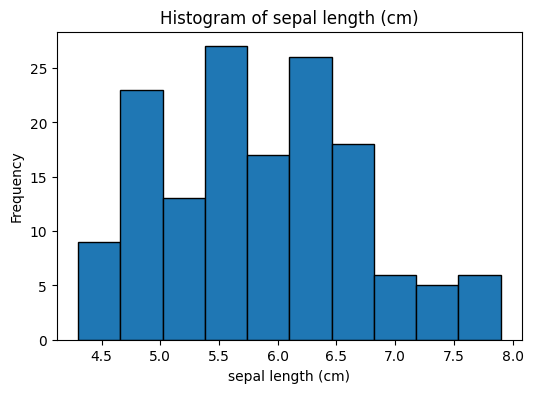

In [4]:
# Cell 4: Plot histogram for a numeric column
plot_histogram(df_clean['sepal length (cm)'])

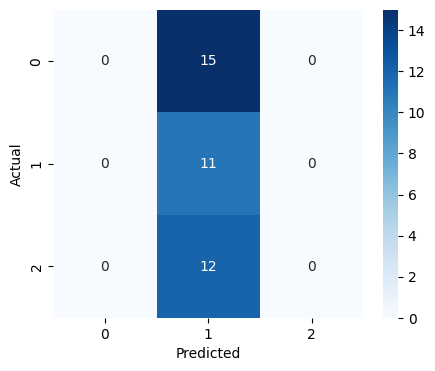

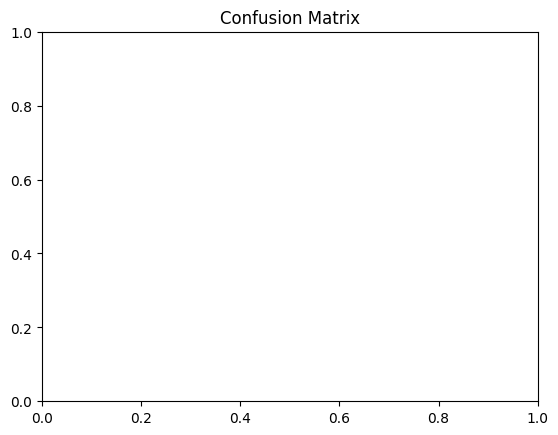

In [5]:
# Cell 5: Train a dummy classifier and plot confusion matrix
X = df_clean.drop(columns='target')
y = df_clean['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = DummyClassifier(strategy='most_frequent')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plot_confusion(y_test, y_pred)

In [7]:
# Cell 6: Interactive histogram for numeric columns
interactive_plot(df_clean)

interactive(children=(Dropdown(description='col', options=('sepal length (cm)', 'sepal width (cm)', 'petal len…